In [15]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [16]:
def testar_estacionariedade(serie):
    resultado = adfuller(serie)
    print('ADF Statistic:', resultado[0])
    print('p-value:', resultado[1])
    if resultado[1] < 0.05:
        print('A série é estacionária')
    else:
        print('A série não é estacionária')

In [25]:

def remove_multicollinear_variables(df, correlation_threshold=0.5):
    """
    Remove variáveis com alta correlação multicolinear.
    
    Parâmetros:
    df (DataFrame): DataFrame contendo as variáveis a serem analisadas.
    correlation_threshold (float): Limite acima do qual variáveis são consideradas multicolineares.
    
    Retorno:
    df_reduced (DataFrame): DataFrame com variáveis multicolineares removidas.
    removed_variables (list): Lista das variáveis removidas.
    """
    # Calcular a matriz de correlação
    corr_matrix = df.corr().abs()
    
    # Selecionar a matriz superior, sem a diagonal principal
    upper = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identificar variáveis com correlação maior que o limite
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    
    # Remover variáveis com alta correlação
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced, to_drop

In [41]:
# 1. Carregar e preparar os dados
df = pd.read_parquet('base.parquet')

data_inicial = '20160101'
data_final = '20231201'

# corte temporal
df = df[df['DATA_REFERENCIA'] >= data_inicial]
df = df[df['DATA_REFERENCIA'] <= data_final]

# definindo índice
df.set_index('DATA_REFERENCIA', inplace=True)

# define target
target = 'PD'

# Verificar as primeiras linhas
df.head()

,PD,IBC_BR,PRODUCAO_INDUSTRIAL,SLD_CREDITO_TOTAL_BRASIL_BI,TAXA_SELIC_MES_VAR_ACUM,CDI_OVER_MES_VAR_ACUM,TAXA_CAMBIO,IPCA,INCC_DI,IBOVESPA,...,COMPROMETIMENTO_RENDA_LAG_1,COMPROMETIMENTO_RENDA_LAG_3,COMPROMETIMENTO_RENDA_LAG_6,COMPROMETIMENTO_RENDA_LAG_9,COMPROMETIMENTO_RENDA_LAG_12,ENDIVIDAMENTO_FAMILIA_LAG_1,ENDIVIDAMENTO_FAMILIA_LAG_3,ENDIVIDAMENTO_FAMILIA_LAG_6,ENDIVIDAMENTO_FAMILIA_LAG_9,ENDIVIDAMENTO_FAMILIA_LAG_12
DATA_REFERENCIA,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.057479,128.22,88.87564,3208.12,1.055878,1.054930,4.052350,1.27,0.391703,40405.99,...,23.38,24.71,24.64,24.61,24.29,40.07,40.85,40.42,40.08,39.67
2016-02-01,0.056782,130.77,88.35558,3192.29,1.002820,1.001486,3.973742,0.90,0.537622,42793.86,...,23.64,24.19,24.76,24.51,24.52,40.09,40.57,40.61,40.08,39.70
2016-03-01,0.056451,140.24,97.51803,3170.85,1.162077,1.160530,3.703918,0.43,0.638370,50055.27,...,23.69,23.38,25.09,24.60,24.47,39.78,40.07,40.84,40.14,39.79
2016-04-01,0.056307,135.99,96.72772,3150.82,1.055878,1.054473,3.565845,0.61,0.547581,53910.51,...,23.98,23.64,24.71,24.64,24.61,39.61,40.09,40.85,40.42,40.08
2016-05-01,0.059899,133.53,100.51023,3157.80,1.108964,1.107487,3.539290,0.78,0.083402,48471.71,...,23.94,23.69,24.19,24.76,24.51,39.31,39.78,40.57,40.61,40.08


In [42]:
# Exemplo de uso:
df, removed_variables = remove_multicollinear_variables(df, correlation_threshold=0.3)
print("Variáveis removidas:", removed_variables)

Variáveis removidas: ['IBC_BR', 'PRODUCAO_INDUSTRIAL', 'SLD_CREDITO_TOTAL_BRASIL_BI', 'TAXA_SELIC_MES_VAR_ACUM', 'CDI_OVER_MES_VAR_ACUM', 'TAXA_CAMBIO', 'INCC_DI', 'IBOVESPA', 'TAXA_DESEMPREGO', 'COMPROMETIMENTO_RENDA', 'ENDIVIDAMENTO_FAMILIA', 'IBC_BR_DIFF1', 'PRODUCAO_INDUSTRIAL_DIFF1', 'SLD_CREDITO_TOTAL_BRASIL_BI_DIFF1', 'TAXA_SELIC_MES_VAR_ACUM_DIFF1', 'CDI_OVER_MES_VAR_ACUM_DIFF1', 'IPCA_DIFF1', 'INCC_DI_DIFF1', 'IBOVESPA_DIFF1', 'TAXA_DESEMPREGO_DIFF1', 'COMPROMETIMENTO_RENDA_DIFF1', 'ENDIVIDAMENTO_FAMILIA_DIFF1', 'PD_LAG_1', 'PD_LAG_3', 'PD_LAG_6', 'PD_LAG_9', 'PD_LAG_12', 'IBC_BR_LAG_1', 'IBC_BR_LAG_3', 'IBC_BR_LAG_6', 'IBC_BR_LAG_9', 'IBC_BR_LAG_12', 'PRODUCAO_INDUSTRIAL_LAG_1', 'PRODUCAO_INDUSTRIAL_LAG_3', 'PRODUCAO_INDUSTRIAL_LAG_6', 'PRODUCAO_INDUSTRIAL_LAG_9', 'PRODUCAO_INDUSTRIAL_LAG_12', 'SLD_CREDITO_TOTAL_BRASIL_BI_LAG_1', 'SLD_CREDITO_TOTAL_BRASIL_BI_LAG_3', 'SLD_CREDITO_TOTAL_BRASIL_BI_LAG_6', 'SLD_CREDITO_TOTAL_BRASIL_BI_LAG_9', 'SLD_CREDITO_TOTAL_BRASIL_BI_LAG_12',

C:\Users\Douglas\AppData\Local\Temp\ipykernel_12780\1029701223.py:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  upper = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))


In [43]:
df.columns

Index(['PD', 'IPCA', 'PD_DIFF1', 'TAXA_CAMBIO_DIFF1'], dtype='object')

In [44]:
# Definir a amostra de treino com 80% dos dados
train_size = int(len(df) * 0.8)
df_train = df[:train_size]
df_test = df[train_size:]

In [45]:
# Verificar a estacionariedade na variável alvo
testar_estacionariedade(df_train[target])

ADF Statistic: -1.7704520417377954
p-value: 0.3952269345352508
A série não é estacionária


In [46]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Realizar o teste de cointegração de Johansen
johansen_test = coint_johansen(df_train, det_order=0, k_ar_diff=1)

# Exibir os resultados do teste de cointegração
johansen_test.lr1, johansen_test.lr2

(array([ 5.66967137e+01,  1.79769356e+01,  2.41717475e+00, -7.04902803e-12]),
 array([ 3.87197781e+01,  1.55597609e+01,  2.41717475e+00, -7.04902803e-12]))

In [48]:
from statsmodels.tsa.vector_ar.vecm import VECM

# Definir o modelo VECM com a ordem de defasagem 1 (pode ser ajustado conforme necessário)
vecm_model = VECM(df_train, k_ar_diff=1, coint_rank=1)
vecm_fitted = vecm_model.fit()

# Exibir o resumo do modelo VECM
vecm_fitted.summary()

C:\Users\Douglas\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,coef,std err,z,P>|z|,[0.025,0.975]
L1.PD,1.937e+11,8.62e+06,2.25e+04,0.000,1.94e+11,1.94e+11
L1.IPCA,-0.0006,0.001,-0.892,0.373,-0.002,0.001
L1.PD_DIFF1,0.0871,0.117,0.743,0.458,-0.143,0.317
L1.TAXA_CAMBIO_DIFF1,-0.0013,0.001,-1.160,0.246,-0.003,0.001
,coef,std err,z,P>|z|,[0.025,0.975]
L1.PD,-3.245e+13,1.54e+09,-2.11e+04,0.000,-3.25e+13,-3.25e+13
L1.IPCA,-0.3103,0.113,-2.752,0.006,-0.531,-0.089
L1.PD_DIFF1,-13.2974,20.919,-0.636,0.525,-54.297,27.703
L1.TAXA_CAMBIO_DIFF1,-0.0126,0.198,-0.064,0.949,-0.400,0.375
,coef,std err,z,P>|z|,[0.025,0.975]


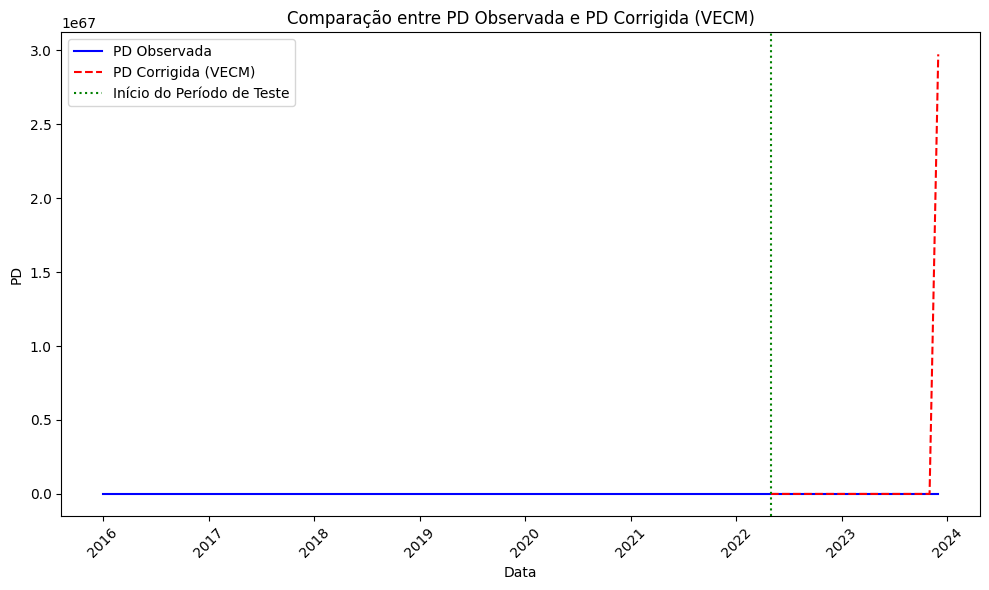

In [52]:
# Verificar se a coluna DATA_REFERENCIA está no índice
if df_test.index.name == 'DATA_REFERENCIA':
    # Resetar o índice para movê-la de volta para uma coluna
    df_test = df_test.reset_index()
    df_train = df_train.reset_index()

# Repetir o processo de combinação de dados de treino e teste
df_combined = pd.concat([df_train[['DATA_REFERENCIA', 'PD']], df_test[['DATA_REFERENCIA', 'PD', 'PD_pred']]], axis=0)

# Recriar o gráfico comparando PD observada e corrigida
plt.figure(figsize=(10, 6))
plt.plot(df_combined['DATA_REFERENCIA'], df_combined['PD'], label='PD Observada', color='blue')
plt.plot(df_test['DATA_REFERENCIA'], df_test['PD_pred'], label='PD Corrigida (VECM)', color='red', linestyle='--')
plt.axvline(x=df_test['DATA_REFERENCIA'].min(), color='green', linestyle=':', label='Início do Período de Teste')
plt.title('Comparação entre PD Observada e PD Corrigida (VECM)')
plt.xlabel('Data')
plt.ylabel('PD')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('base.parquet')

In [3]:
data_inicial = '20160101'
data_final = '20231201'

# corte temporal
df = df[df['DATA_REFERENCIA'] >= data_inicial]
df = df[df['DATA_REFERENCIA'] <= data_final]

# definindo índice
df.set_index('DATA_REFERENCIA', inplace=True)

In [4]:
df

,PD,IBC_BR,PRODUCAO_INDUSTRIAL,SLD_CREDITO_TOTAL_BRASIL_BI,TAXA_SELIC_MES_VAR_ACUM,CDI_OVER_MES_VAR_ACUM,TAXA_CAMBIO,IPCA,INCC_DI,IBOVESPA,...,COMPROMETIMENTO_RENDA_LAG_1,COMPROMETIMENTO_RENDA_LAG_3,COMPROMETIMENTO_RENDA_LAG_6,COMPROMETIMENTO_RENDA_LAG_9,COMPROMETIMENTO_RENDA_LAG_12,ENDIVIDAMENTO_FAMILIA_LAG_1,ENDIVIDAMENTO_FAMILIA_LAG_3,ENDIVIDAMENTO_FAMILIA_LAG_6,ENDIVIDAMENTO_FAMILIA_LAG_9,ENDIVIDAMENTO_FAMILIA_LAG_12
DATA_REFERENCIA,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.057479,128.22,88.87564,3208.12,1.055878,1.054930,4.052350,1.27,0.391703,40405.99,...,23.38,24.71,24.64,24.61,24.29,40.07,40.85,40.42,40.08,39.67
2016-02-01,0.056782,130.77,88.35558,3192.29,1.002820,1.001486,3.973742,0.90,0.537622,42793.86,...,23.64,24.19,24.76,24.51,24.52,40.09,40.57,40.61,40.08,39.70
2016-03-01,0.056451,140.24,97.51803,3170.85,1.162077,1.160530,3.703918,0.43,0.638370,50055.27,...,23.69,23.38,25.09,24.60,24.47,39.78,40.07,40.84,40.14,39.79
2016-04-01,0.056307,135.99,96.72772,3150.82,1.055878,1.054473,3.565845,0.61,0.547581,53910.51,...,23.98,23.64,24.71,24.64,24.61,39.61,40.09,40.85,40.42,40.08
2016-05-01,0.059899,133.53,100.51023,3157.80,1.108964,1.107487,3.539290,0.78,0.083402,48471.71,...,23.94,23.69,24.19,24.76,24.51,39.31,39.78,40.57,40.61,40.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.032080,151.36,111.25394,5553.90,1.137506,1.137506,4.903543,0.23,0.170000,115741.81,...,27.54,27.91,27.94,27.42,27.06,48.06,48.91,48.75,49.46,49.65
2023-09-01,0.032359,144.90,106.28858,5614.67,0.972912,0.972912,4.936990,0.26,0.340000,116565.17,...,27.22,27.85,27.97,27.72,27.22,48.25,48.47,48.65,49.06,49.53
2023-10-01,0.032385,145.00,107.02784,5636.98,0.997572,0.997572,5.065210,0.24,0.200000,113143.67,...,27.09,27.54,27.98,27.84,27.29,48.14,48.06,48.59,49.05,49.72


In [5]:
df.to_excel('df.xlsx', index = True)